# Time Series

In this chapter you'll explore the two datasets you'll use in this course.


The first is a collection of heartbeat sounds. Hearts normally have a predictable sound pattern as they beat, but some disorders can cause the heart to beat abnormally. This dataset contains a training set with labels for each type of heartbeat, and a testing set with no labels. You'll use the testing set to validate your models. (datacamp)

The next dataset contains information about company market value over several years of time. This is one of the most popular kind of time series data used for regression. If you can model the value of a company as it changes over time, you can make predictions about where that company will be in the future


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

           symbol       close       volume
date                                      
2010-01-04   AAPL  214.009998  123432400.0
2010-01-04    ABT   54.459951   10829000.0
2010-01-04    AIG   29.889999    7750900.0
2010-01-04   AMAT   14.300000   18615100.0
2010-01-04   ARNC   16.650013   11512100.0


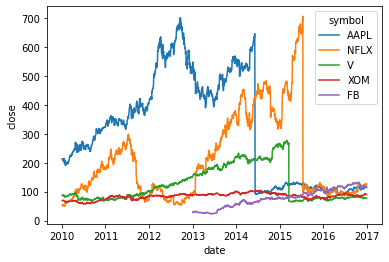

In [2]:
# Read in the data
data = pd.read_csv('https://assets.datacamp.com/production/repositories/1536/datasets/43d325fa67cde1d4d5de62adc108fceabaddf3cc/prices.csv', index_col=0)

# Convert the index of the DataFrame to datetime
data.index = pd.to_datetime(data.index)
print(data.head())
#select a few stocks
stocks=['AAPL','FB','NFLX','XOM','V']
best_stocks=data[data.symbol.isin(stocks)]

# Loop through each column, plot its values over time
sns.lineplot(data=best_stocks,x='date',y='close',hue='symbol')
plt.show()

In [3]:
# parent folder of sound files
INPUT_DIR=r"C:\Users\56945\Desktop\Data Science Portfolio\Heavy Datasets\heartbeats"
# 16 KHz
SAMPLE_RATE = 16000
# seconds
MAX_SOUND_CLIP_DURATION=12   

In [4]:
set_a=pd.read_csv(INPUT_DIR+"/set_a.csv")
set_a.head()

,dataset,fname,label,sublabel
0,a,set_a/artifact__201012172012.wav,artifact,NaN
1,a,set_a/artifact__201105040918.wav,artifact,NaN
2,a,set_a/artifact__201105041959.wav,artifact,NaN
3,a,set_a/artifact__201105051017.wav,artifact,NaN
4,a,set_a/artifact__201105060108.wav,artifact,NaN


In [5]:
set_a_timing=pd.read_csv(INPUT_DIR+"/set_a_timing.csv")
set_a_timing.head()

,fname,cycle,sound,location
0,set_a/normal__201102081321.wav,1,S1,10021
1,set_a/normal__201102081321.wav,1,S2,20759
2,set_a/normal__201102081321.wav,2,S1,35075
3,set_a/normal__201102081321.wav,2,S2,47244
4,set_a/normal__201102081321.wav,3,S1,62992


In [6]:
set_b=pd.read_csv(INPUT_DIR+"/set_b.csv")
set_b.head()

,dataset,fname,label,sublabel
0,b,set_b/Btraining_extrastole_127_1306764300147_C...,extrastole,NaN
1,b,set_b/Btraining_extrastole_128_1306344005749_A...,extrastole,NaN
2,b,set_b/Btraining_extrastole_130_1306347376079_D...,extrastole,NaN
3,b,set_b/Btraining_extrastole_134_1306428161797_C...,extrastole,NaN
4,b,set_b/Btraining_extrastole_138_1306762146980_B...,extrastole,NaN


In [7]:
#merge both set-a and set-b
frames = [set_a, set_b]
train_ab=pd.concat(frames)
train_ab.describe()

,dataset,fname,label,sublabel
count,832,832,585,149
unique,2,832,5,2
top,b,set_a/artifact__201012172012.wav,normal,noisynormal
freq,656,1,351,120


In [8]:
nb_classes=train_ab.label.unique()

print("Number of training examples=", train_ab.shape[0], "  Number of classes=", len(train_ab.label.unique()))
print (nb_classes)

Number of training examples= 832   Number of classes= 6
['artifact' 'extrahls' 'murmur' 'normal' nan 'extrastole']


In [9]:
###plot the different classes and their subclasses 
## plot wiz 

## In the next step we're going to visualize two ways to plot the duration of the audio vs their frequencies for all the different types of audio files.

## Normal audio files
In the Normal category there are normal, healthy heart sounds. These may contain noise in the final second of the recording as the device is removed from the body. They may contain a variety of background noises (from traffic to radios). They may also contain occasional random noise corresponding to breathing, or brushing the microphone against clothing or skin. A normal heart sound has a clear “lub dub, lub dub” pattern, with the time from “lub” to “dub” shorter than the time from “dub” to the next “lub” (when the heart rate is less than 140 beats per minute)(source: Rita Getz)


duration: 4.963809523809524
(109452,) 22050


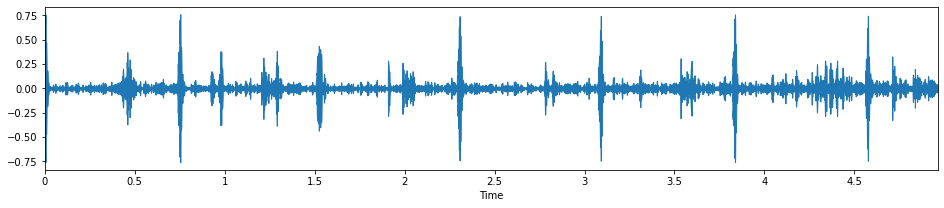

-------------------------------both perfoms the same plot-------------


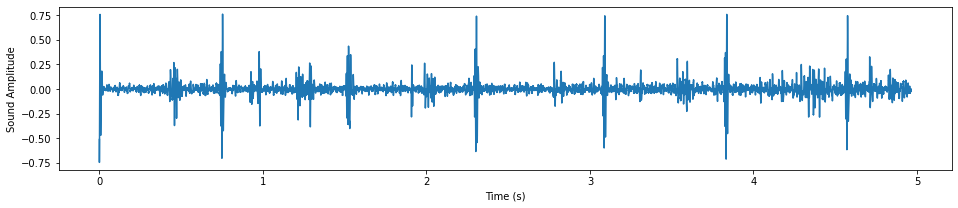

In [10]:
import librosa as lr
import librosa.display 
normal_file=INPUT_DIR+"/set_a/normal__201106111136.wav"

# Load using Librosa
audio, sfreq = lr.load(normal_file)   #default sampling rate is 22 HZ
dur=lr.get_duration(audio)            #final  duration
time=np.arange(0, len(audio)) / sfreq      #time array

print ("duration:", dur)
print(audio.shape, sfreq)

# librosa plot
plt.figure(figsize=(16, 3))
librosa.display.waveplot(audio, sr=sfreq)
plt.show()

print('-------------------------------both perfoms the same plot-------------')
# Plot audio over time
fig, ax = plt.subplots(figsize=(16,3))
ax.plot(time,audio)
ax.set(xlabel='Time (s)', ylabel='Sound Amplitude')
plt.show()


## Murmur


Heart murmurs sound as though there is a “whooshing, roaring, rumbling, or turbulent fluid” noise in one of two temporal locations: (1) between “lub” and “dub”, or (2) between “dub” and “lub”. They can be a symptom of many heart disorders, some serious. There will still be a “lub” and a “dub”. One of the things that confuses non-medically trained people is that murmurs happen between lub and dub or between dub and lub; not on lub and not on dub.(source: Rita Getz)

duration: 5.0
(110250,) 22050


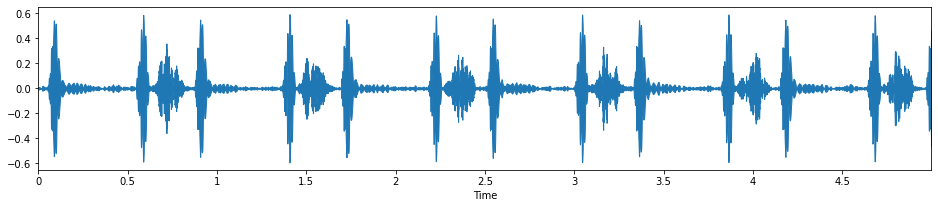

In [13]:
murmur_file=INPUT_DIR+"/set_a/murmur__201108222231.wav"
audio_murmur, sfreq_murmur = librosa.load(murmur_file,duration=5)
dur=librosa.get_duration(audio_murmur)
print ("duration:", dur)
print(audio_murmur.shape,sfreq_murmur)

plt.figure(figsize=(16, 3))
librosa.display.waveplot(audio_murmur, sr=sfreq_murmur)

# buscar en internet formas avanzadas de visualizar audios (frequencia, hertz) 
# buscar en que se descompone un audio e intentar visualizar todo